In [13]:
from pycaret.classification import * 

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from matplotlib import rc
import matplotlib.font_manager as fm
plt.rcParams['font.family'] = 'Malgun Gothic'
%matplotlib inline

# 데이터 불러오기

In [15]:
data=pd.read_csv('산불_전체기상데이터_정규화.csv',encoding='utf-8',index_col=0)

In [16]:
data.head()

,년,월,일,발생지역,지점,피해면적,평균기온(°C),평균 풍속(m/s),일강수량(mm),상대습도,실효습도,계절
0,2022,5,31,KB,992,5.30,1.071246,0.118464,-0.269151,39.4,35.771319,봄
1,2022,4,18,KB,992,0.03,0.299490,-0.138252,-0.269151,33.3,35.766492,봄
2,2022,10,19,KB,992,0.01,-0.472266,-0.394968,-0.269151,56.9,49.668174,기타
3,2022,12,20,KB,992,0.16,-1.645335,-0.822828,-0.269151,61.8,45.023499,가을
4,2022,4,20,KB,991,3.18,0.443551,0.631896,-0.269151,35.5,29.199069,봄


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10011 entries, 0 to 10010
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   년           10011 non-null  int64  
 1   월           10011 non-null  int64  
 2   일           10011 non-null  int64  
 3   발생지역        10011 non-null  object 
 4   지점          10011 non-null  int64  
 5   피해면적        10011 non-null  float64
 6   평균기온(°C)    10011 non-null  float64
 7   평균 풍속(m/s)  10011 non-null  float64
 8   일강수량(mm)    10011 non-null  float64
 9   상대습도        9368 non-null   float64
 10  실효습도        9345 non-null   float64
 11  계절          10011 non-null  object 
dtypes: float64(6), int64(4), object(2)
memory usage: 1016.7+ KB


In [18]:
data.columns

Index(['년', '월', '일', '발생지역', '지점', '피해면적', '평균기온(°C)', '평균 풍속(m/s)',
       '일강수량(mm)', '상대습도', '실효습도', '계절'],
      dtype='object')

In [19]:
data.drop(['년','월','일','발생지역','지점'],axis=1,inplace=True)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10011 entries, 0 to 10010
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   피해면적        10011 non-null  float64
 1   평균기온(°C)    10011 non-null  float64
 2   평균 풍속(m/s)  10011 non-null  float64
 3   일강수량(mm)    10011 non-null  float64
 4   상대습도        9368 non-null   float64
 5   실효습도        9345 non-null   float64
 6   계절          10011 non-null  object 
dtypes: float64(6), object(1)
memory usage: 625.7+ KB


In [21]:
data.head()

,피해면적,평균기온(°C),평균 풍속(m/s),일강수량(mm),상대습도,실효습도,계절
0,5.30,1.071246,0.118464,-0.269151,39.4,35.771319,봄
1,0.03,0.299490,-0.138252,-0.269151,33.3,35.766492,봄
2,0.01,-0.472266,-0.394968,-0.269151,56.9,49.668174,기타
3,0.16,-1.645335,-0.822828,-0.269151,61.8,45.023499,가을
4,3.18,0.443551,0.631896,-0.269151,35.5,29.199069,봄


In [22]:
data.describe()

,피해면적,평균기온(°C),평균 풍속(m/s),일강수량(mm),상대습도,실효습도
count,10011.000000,10011.000000,10011.000000,10011.000000,9368.000000,9345.000000
mean,4.318035,-0.314382,0.019387,-0.244542,50.732035,44.049002
std,171.710795,0.804896,0.863906,0.158189,13.213977,8.984958
min,0.000000,-2.651920,-1.673767,-0.280083,10.400000,18.425328
25%,0.030000,-0.898390,-0.547116,-0.269151,41.100000,37.682457
50%,0.100000,-0.331327,-0.201567,-0.265740,50.100000,43.937583
75%,0.400000,0.260873,0.325066,-0.263493,59.800000,50.113650
max,16301.980000,1.997354,11.249907,4.086121,98.100000,75.617412


In [23]:
data['계절'].value_counts()

봄     7176
가을    1719
기타    1116
Name: 계절, dtype: int64

In [24]:
mean1=data['상대습도'].median()
mean2=data['실효습도'].median()

In [25]:
data["상대습도"].fillna(mean1, inplace=True)
data["실효습도"].fillna(mean2, inplace=True)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10011 entries, 0 to 10010
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   피해면적        10011 non-null  float64
 1   평균기온(°C)    10011 non-null  float64
 2   평균 풍속(m/s)  10011 non-null  float64
 3   일강수량(mm)    10011 non-null  float64
 4   상대습도        10011 non-null  float64
 5   실효습도        10011 non-null  float64
 6   계절          10011 non-null  object 
dtypes: float64(6), object(1)
memory usage: 625.7+ KB


In [27]:
data.describe()

,피해면적,평균기온(°C),평균 풍속(m/s),일강수량(mm),상대습도,실효습도
count,10011.000000,10011.000000,10011.000000,10011.000000,10011.000000,10011.000000
mean,4.318035,-0.314382,0.019387,-0.244542,50.691439,44.041590
std,171.710795,0.804896,0.863906,0.158189,12.783468,8.680958
min,0.000000,-2.651920,-1.673767,-0.280083,10.400000,18.425328
25%,0.030000,-0.898390,-0.547116,-0.269151,42.000000,38.193283
50%,0.100000,-0.331327,-0.201567,-0.265740,50.100000,43.937583
75%,0.400000,0.260873,0.325066,-0.263493,59.000000,49.601913
max,16301.980000,1.997354,11.249907,4.086121,98.100000,75.617412


In [28]:
data = pd.get_dummies(data = data, columns = ['계절'], prefix = '계절')

In [29]:
#data['계절'] = data['계절'].map({'봄': 2, '가을': 1, '그외': 0})

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10011 entries, 0 to 10010
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   피해면적        10011 non-null  float64
 1   평균기온(°C)    10011 non-null  float64
 2   평균 풍속(m/s)  10011 non-null  float64
 3   일강수량(mm)    10011 non-null  float64
 4   상대습도        10011 non-null  float64
 5   실효습도        10011 non-null  float64
 6   계절_가을       10011 non-null  uint8  
 7   계절_기타       10011 non-null  uint8  
 8   계절_봄        10011 non-null  uint8  
dtypes: float64(6), uint8(3)
memory usage: 576.8 KB


In [31]:
#data['계절'].value_counts()

In [32]:
data = data.rename(columns={ data.columns[6]: '가을', data.columns[7]: '여름겨울', data.columns[8]: '봄'})

In [33]:
data.head(2)

,피해면적,평균기온(°C),평균 풍속(m/s),일강수량(mm),상대습도,실효습도,가을,여름겨울,봄
0,5.30,1.071246,0.118464,-0.269151,39.4,35.771319,0,0,1
1,0.03,0.299490,-0.138252,-0.269151,33.3,35.766492,0,0,1


In [34]:
data.columns

Index(['피해면적', '평균기온(°C)', '평균 풍속(m/s)', '일강수량(mm)', '상대습도', '실효습도', '가을',
       '여름겨울', '봄'],
      dtype='object')

In [35]:
heatmap_data = data[['피해면적', '평균기온(°C)', '평균 풍속(m/s)', '일강수량(mm)', '상대습도', '실효습도', '가을',
       '여름겨울', '봄']]

In [36]:
#heatmap_data = data[['피해면적','상대습도', '기온', '강수량', '풍속', '실효습도','계절']]

In [37]:
for i in range(len(data)):
    if data['피해면적'][i]<0.1 :
        data['피해면적'][i]=1
    elif (data['피해면적'][i]>=0.1) & (data['피해면적'][i]<0.5) :
        data['피해면적'][i]=2
    elif (data['피해면적'][i]>=0.5) & (data['피해면적'][i]<5) :
        data['피해면적'][i]=3
    else :
        data['피해면적'][i]=4

In [38]:
data['피해면적'].value_counts()

2.0    3790
1.0    3778
3.0    2159
4.0     284
Name: 피해면적, dtype: int64

<AxesSubplot:>

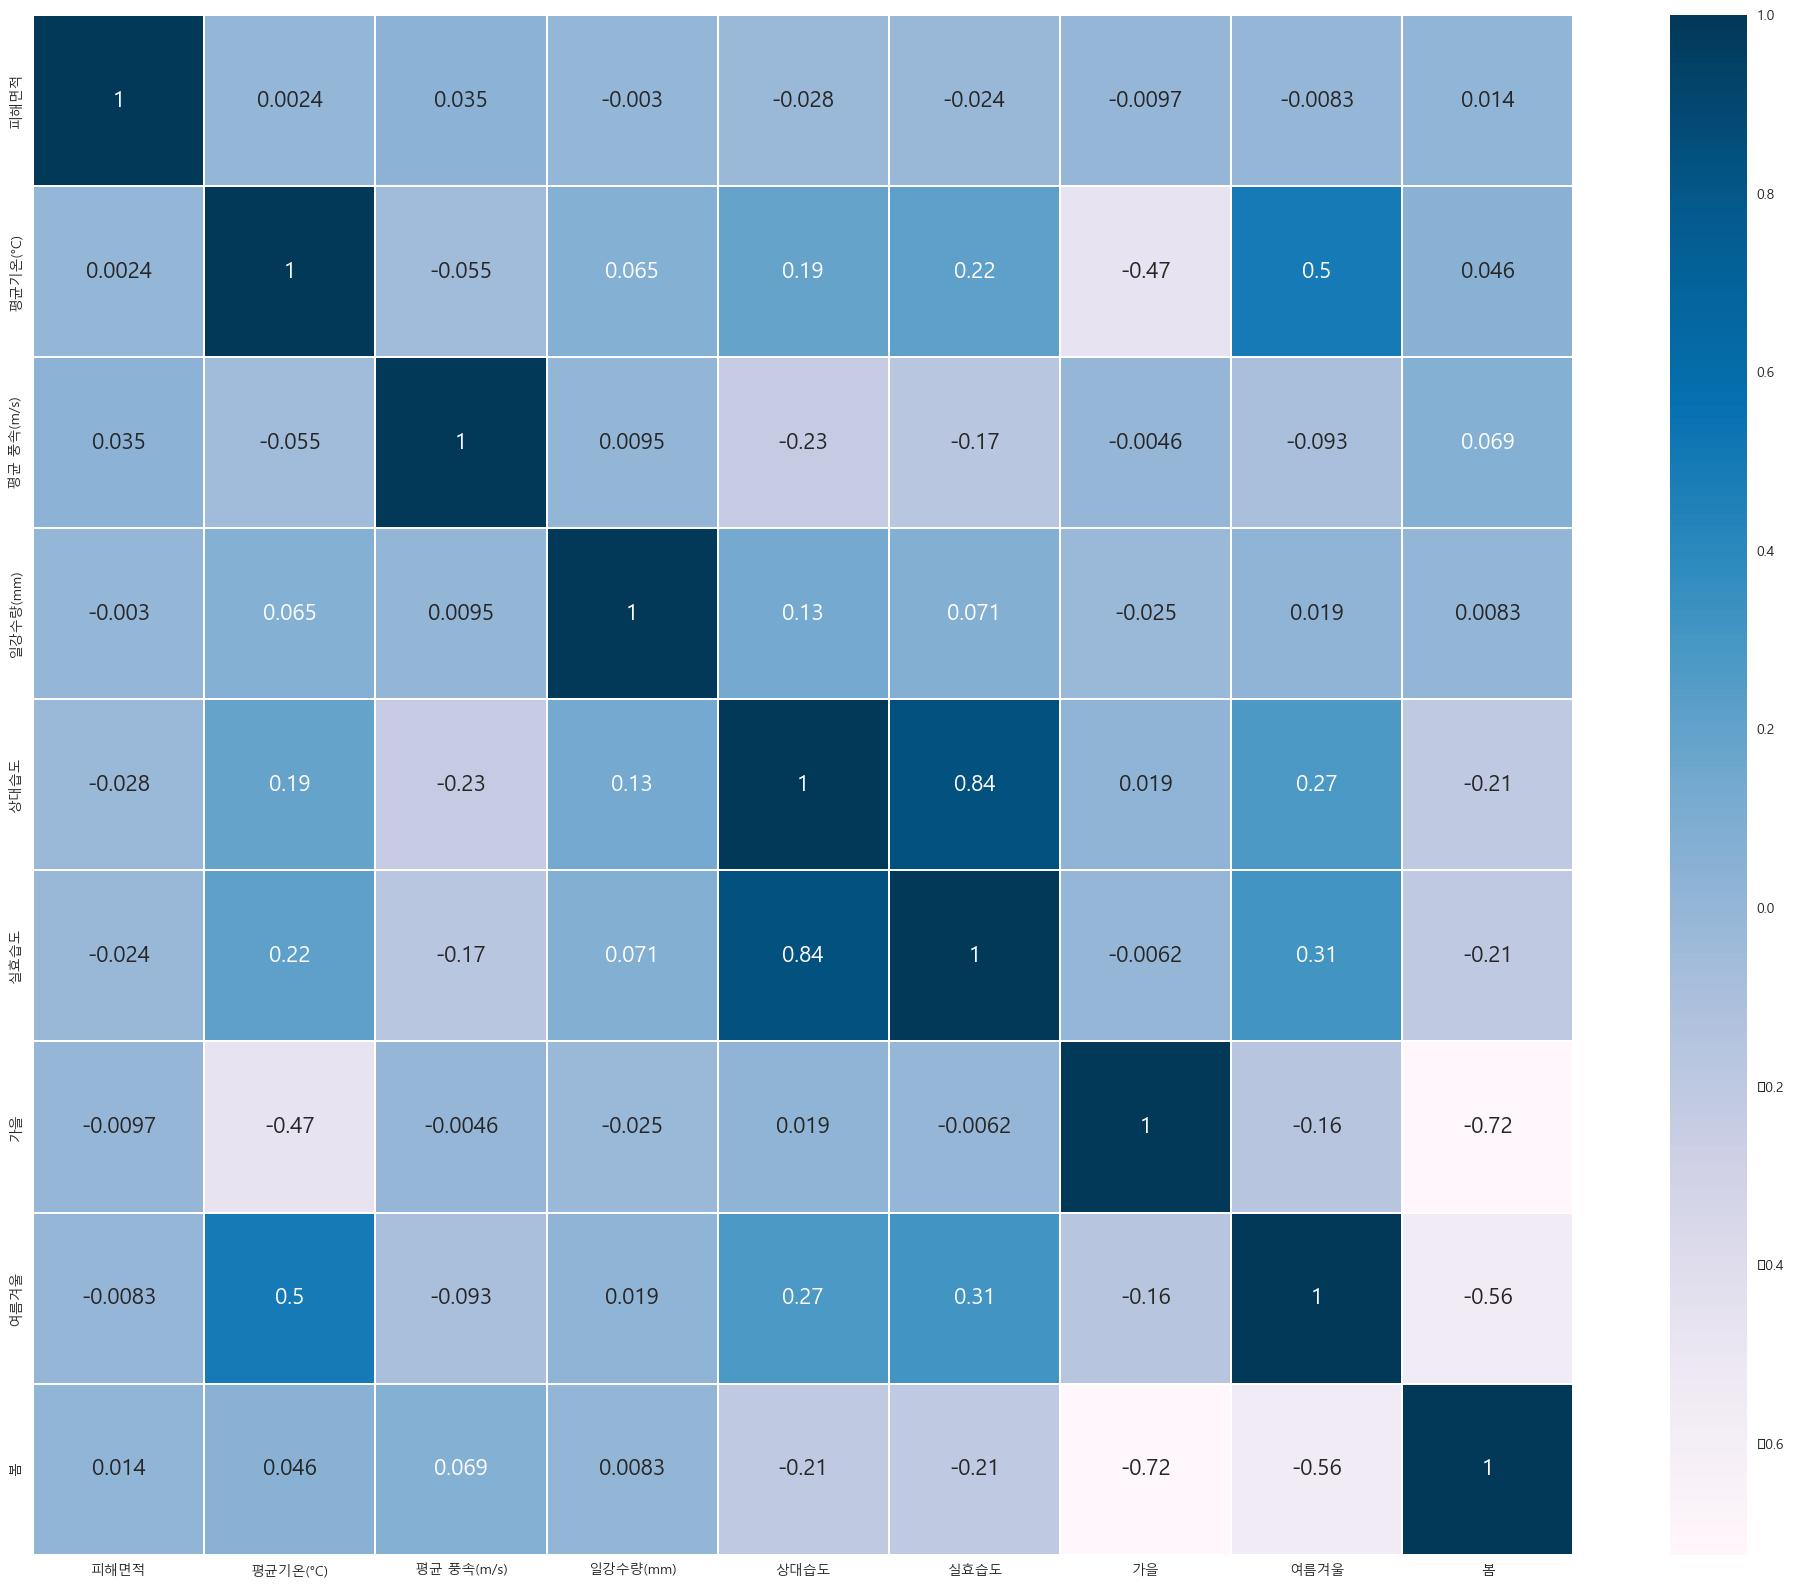

In [39]:
colormap = plt.cm.PuBu
plt.figure(figsize=(25, 20))
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

DATA split

In [40]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

train=data

target = train['피해면적'][:len(train)]

print(train.shape,target.shape)

train.drop(['피해면적'],axis=1,inplace=True)

(10011, 9) (10011,)


In [41]:
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.2,stratify=target,random_state=42) 

print(X_train.shape, X_test.shape,  y_train.shape, y_test.shape )

(8008, 8) (2003, 8) (8008,) (2003,)


# RandomForest

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model1 = RandomForestClassifier(n_estimators=100,random_state=42)
model1.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [43]:
prediction = model1.predict(X_test)
print("Accuracy is: ", accuracy_score(prediction, y_test))
acc_RF=accuracy_score(prediction, y_test)

Accuracy is:  0.4473290064902646


In [44]:
from sklearn.metrics import confusion_matrix

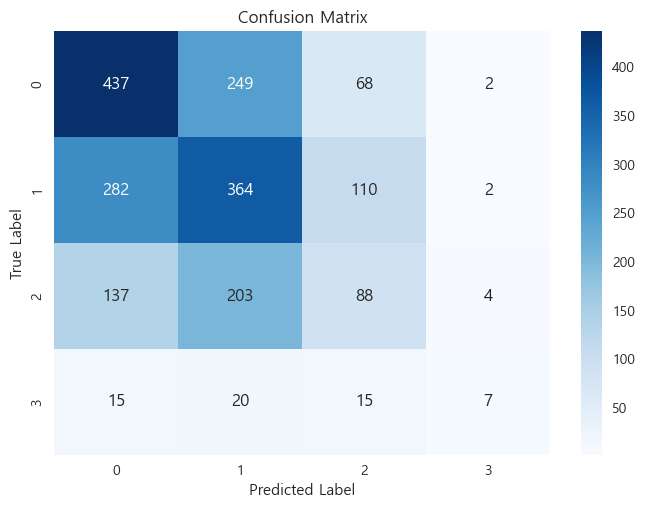

In [45]:
cm = confusion_matrix(y_test, prediction)
sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [46]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

precision = precision_score(y_test, prediction, average=None)
recall = recall_score(y_test, prediction, average=None)

print("Precision:", precision)
print("Recall:", recall)

Precision: [0.50172216 0.4354067  0.31316726 0.46666667]
Recall: [0.57804233 0.48021108 0.2037037  0.12280702]


Text(0.5, 0, 'CatBoost Feature Importance')

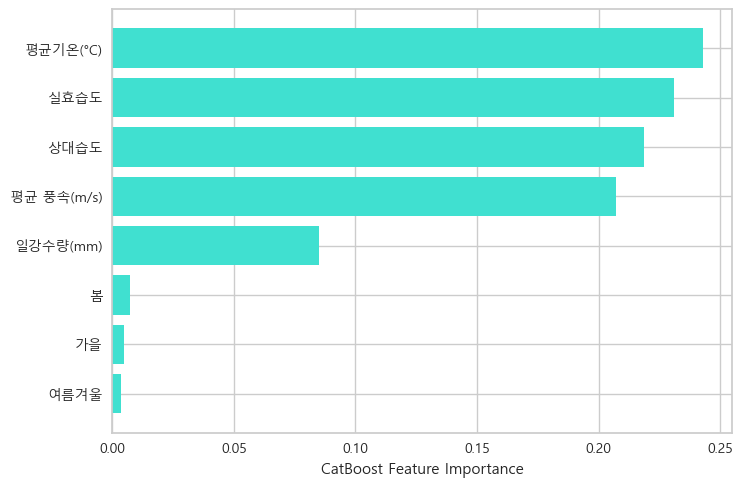

In [47]:
sorted_feature_importance = model1.feature_importances_.argsort()
plt.barh(X_test.columns[sorted_feature_importance],
        model1.feature_importances_[sorted_feature_importance],
        color='turquoise')
plt.xlabel("CatBoost Feature Importance")

# CatBoost

In [48]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(n_estimators=100,random_state=42)
model.fit(X_train, y_train)

Learning rate set to 0.5
0:	learn: 1.2505577	total: 140ms	remaining: 13.8s
1:	learn: 1.1865058	total: 147ms	remaining: 7.2s
2:	learn: 1.1552694	total: 152ms	remaining: 4.92s
3:	learn: 1.1393081	total: 156ms	remaining: 3.75s
4:	learn: 1.1243733	total: 160ms	remaining: 3.03s
5:	learn: 1.1178846	total: 163ms	remaining: 2.55s
6:	learn: 1.1115266	total: 166ms	remaining: 2.2s
7:	learn: 1.1065653	total: 169ms	remaining: 1.94s
8:	learn: 1.1030352	total: 172ms	remaining: 1.74s
9:	learn: 1.0992607	total: 175ms	remaining: 1.58s
10:	learn: 1.0921900	total: 179ms	remaining: 1.44s
11:	learn: 1.0875610	total: 182ms	remaining: 1.33s
12:	learn: 1.0859995	total: 185ms	remaining: 1.24s
13:	learn: 1.0849825	total: 188ms	remaining: 1.15s
14:	learn: 1.0812581	total: 191ms	remaining: 1.08s
15:	learn: 1.0794307	total: 194ms	remaining: 1.02s
16:	learn: 1.0769284	total: 198ms	remaining: 964ms
17:	learn: 1.0742886	total: 201ms	remaining: 914ms
18:	learn: 1.0715735	total: 204ms	remaining: 868ms
19:	learn: 1.06697

In [49]:
prediction = model.predict(X_test)
print("Accuracy is: ", accuracy_score(prediction, y_test))
acc_RF=accuracy_score(prediction, y_test)

Accuracy is:  0.4338492261607589


Text(0.5, 0, 'CatBoost Feature Importance')

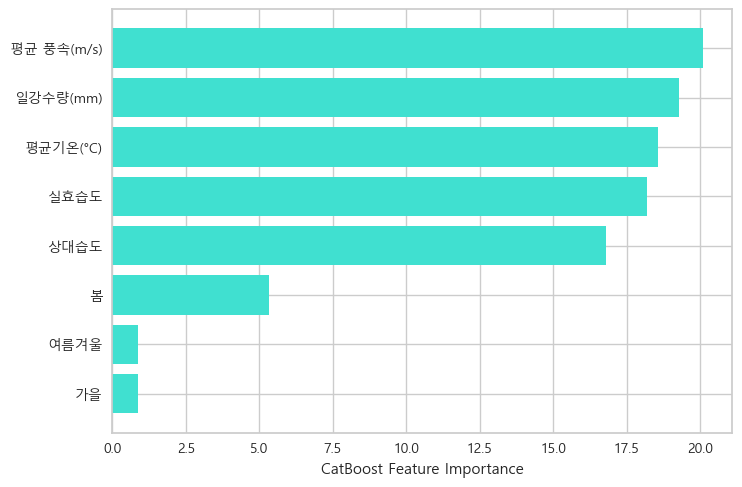

In [50]:
sorted_feature_importance = model.feature_importances_.argsort()
plt.barh(X_test.columns[sorted_feature_importance],
        model.feature_importances_[sorted_feature_importance],
        color='turquoise')
plt.xlabel("CatBoost Feature Importance")

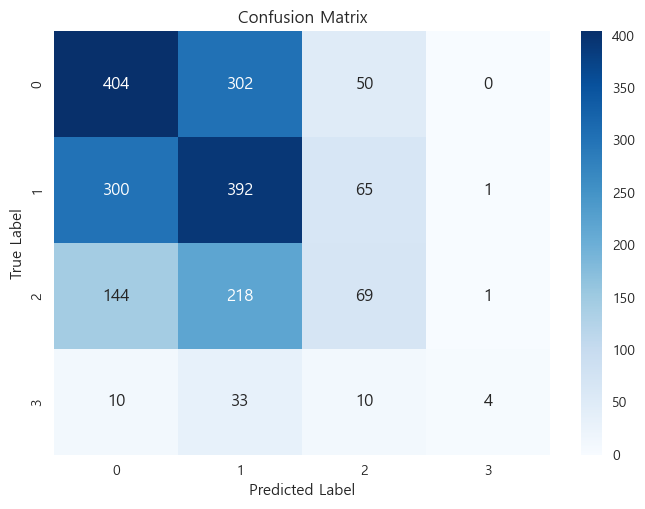

In [51]:
cm = confusion_matrix(y_test, prediction)
sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [53]:
precision = precision_score(y_test, prediction, average=None)
recall = recall_score(y_test, prediction, average=None)

print("Precision:", precision)
print("Recall:", recall)

Precision: [0.47086247 0.41481481 0.3556701  0.66666667]
Recall: [0.53439153 0.5171504  0.15972222 0.07017544]


.

.